In [14]:
from keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print(x_train.shape[0], 'Train Samples')
print(x_test.shape[0], 'Test Samples')

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

60000 Train Samples
10000 Test Samples
X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [8]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train , y_train)

DecisionTreeClassifier()

In [12]:
pred = decision_tree.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8771


Text(0.5, 1.0, 'Accuracy Score: 0.877')

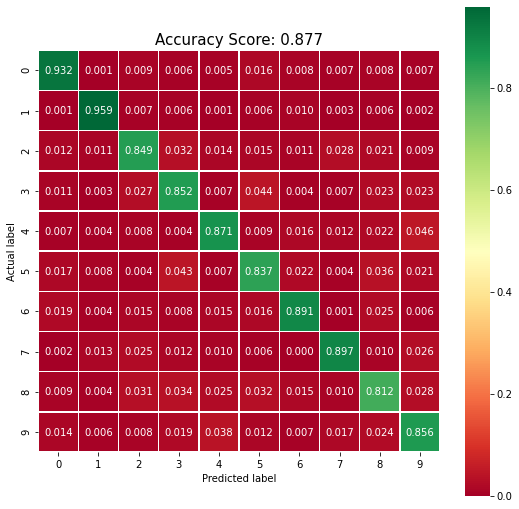

In [15]:
predictions = decision_tree.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9, 9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='RdYlGn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy)
plt.title(all_sample_title, size=15)